In [1]:
from numpy import pi, sin, cos, abs, exp, max
import numpy as np
from tqdm.notebook import trange, tqdm

from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [25]:
a = 0
b = 2

def f(x, y):
    return 2*x*y

def y(x):
    return exp(x**2)

def divide_evenly(a, b, l):
    # n-1 bc: | 1 | 2 | 3 | - we divide on 4 points with 3 steps
    step = (b-a)/(l-1)
    return [a+i*step for i in range(l)] 

n = int(input('N'))
print(f'a: {a}\nb: {b}\nN: {n}')

N 1000


a: 0
b: 2
N: 1000


In [26]:
x_list = divide_evenly(a, b, n)
# x_list

In [27]:
y_list = [y(x_list[0])]
for i in range(1, n):
  y_list.append(y_list[i-1] + (x_list[i]-x_list[i-1])*(f(x_list[i-1], y_list[i-1])))

In [28]:
delta = [abs(y_i - y(x_i)) for (y_i, x_i) in zip(y_list, x_list)]
# delta

In [29]:
table = PrettyTable()
table.field_names = ["x", "~y(x)", "y(x)", 'd']
for x_i, y_i, d_i in zip(x_list, y_list, delta):
    table.add_row([x_i, y_i, y(x_i), d_i])
print(table)


+----------------------+--------------------+--------------------+------------------------+
|          x           |       ~y(x)        |        y(x)        |           d            |
+----------------------+--------------------+--------------------+------------------------+
|         0.0          |        1.0         |        1.0         |          0.0           |
| 0.002002002002002002 |        1.0         | 1.000004008020048  | 4.008020048074101e-06  |
| 0.004004004004004004 | 1.000008016024032  | 1.000016032176578  |  8.01615254597543e-06  |
| 0.006006006006006006 | 1.0000240482006095 | 1.0000360727587505 | 1.2024558140977248e-05 |
| 0.008008008008008008 | 1.0000480968510186 | 1.0000641302485127 | 1.6033397494119583e-05 |
| 0.01001001001001001  | 1.0000801624893287 | 1.0001002053206183 |  2.00428312895351e-05  |
| 0.012012012012012012 | 1.0001202458224112 | 1.0001442988426532 | 2.4053020241998624e-05 |
| 0.014014014014014014 | 1.0001683477499639 | 1.000196411875072  | 2.80641251080

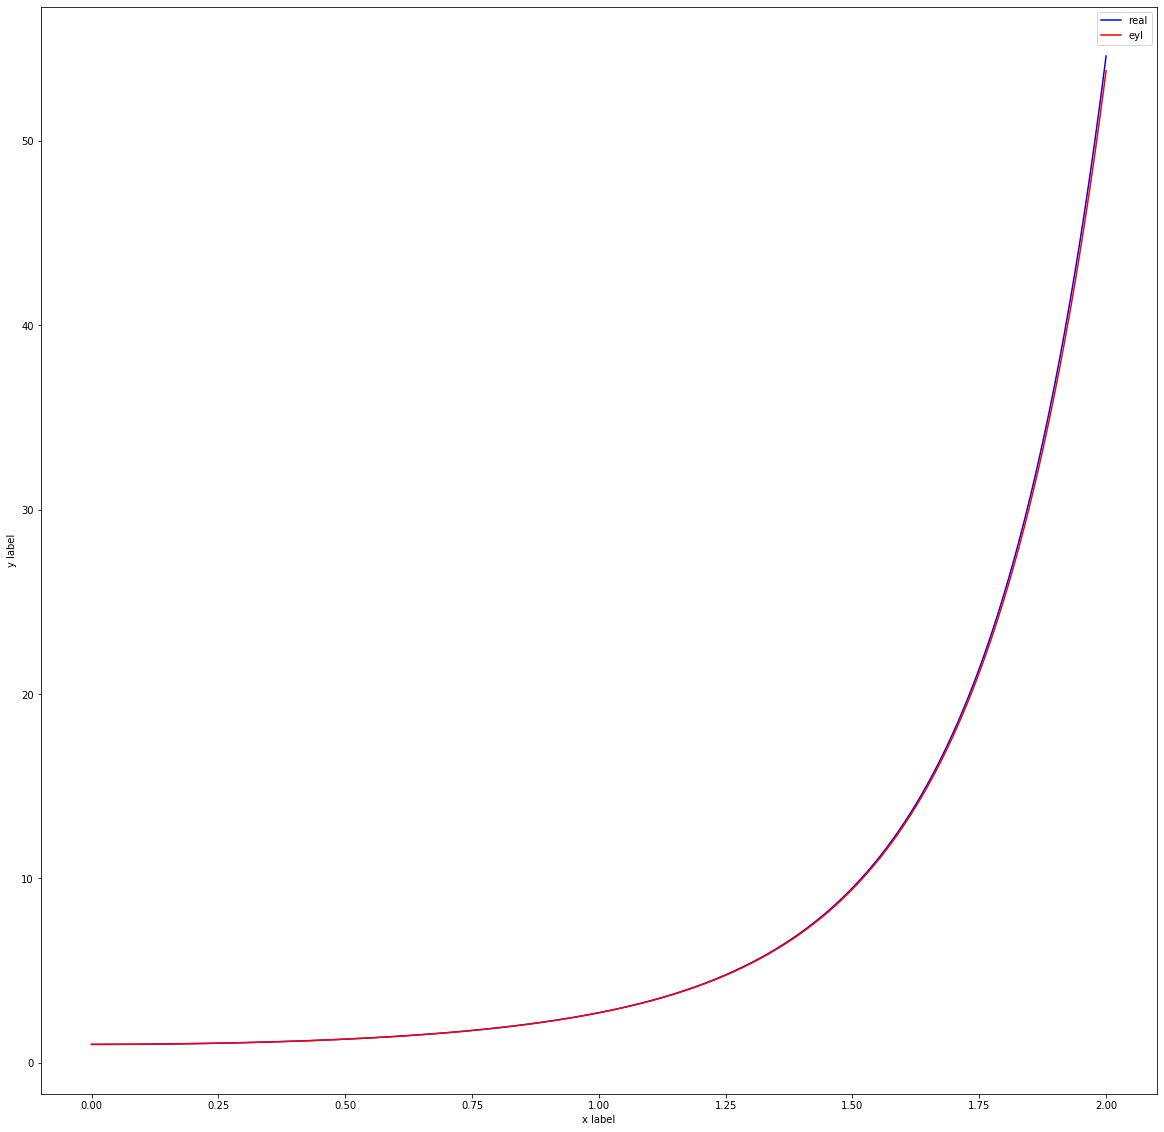

In [30]:
plt.figure(figsize=(20, 20))
plt.plot(x_list, [y(x_i) for x_i in x_list], color='b', label='real')
plt.plot(x_list, y_list, color='r', label='eyl')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend(loc='best')
plt.show()

In [31]:
def compute_error(N):
    x_lst = divide_evenly(a, b, N)
    y_lst = [y(x_lst[0])]
    for i in range(1, N):
      y_lst.append(y_lst[i-1] + (x_lst[i]-x_lst[i-1])*(f(x_lst[i-1], y_lst[i-1])))
    delta = [np.abs(y_i - y(x_i)) for (y_i, x_i) in zip(y_lst, x_lst)]
    return np.max(delta[:])

errors = []
for N_i in tqdm(range(3500, 4000, 1)):
    error = compute_error(int(N_i))
    errors.append({'e':error, 'n': N_i})
    if error < 0.01:
        print(f'N* = {int(N_i)}, error = {error}')
        break


In [32]:
print(compute_error(100))
print(compute_error(1000))
print(compute_error(3976))

7.248979835355669
0.7925720675960264
0.20087938075035083


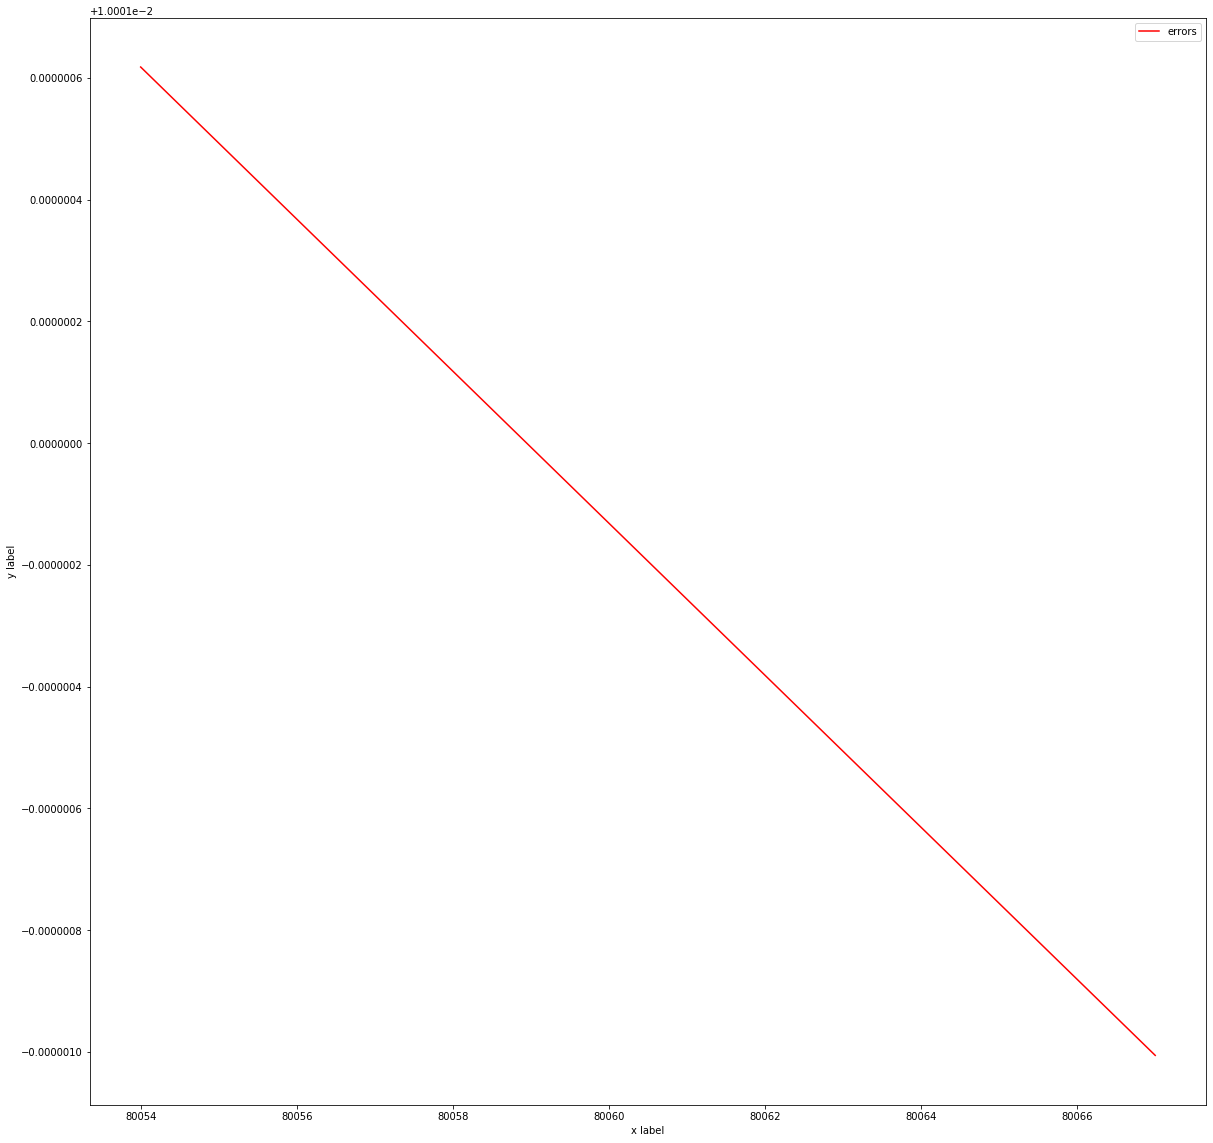

In [9]:
plt.figure(figsize=(20, 20))
s = slice(int(len(errors)*0.8), len(errors))
plt.plot([e['n'] for e in errors[s]], [e['e'] for e in errors[s]], color='r', label='errors')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend(loc='best')
plt.show()